# BANK CUSTOMER CHURN (ANALYSIS & PREDICTION)

- The aim of the project is to analyze the bank customer churn data to find insight into the churn and build a model for predicting customer churn

- RowNumber — corresponds to the record (row) number and has no effect on the output.
- CustomerId — contains random values and has no effect on customer leaving the bank.
- Surname—the surname of a customer has no impact on their decision to leave the bank.
- CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography — a customer’s location can affect their decision to leave the bank.
- Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts —refers to the number of products that a customer has purchased through the bank.
- HasCrCard —denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember —active customers are less likely to leave the bank.
- EstimatedSalary —as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited —whether or not the customer left the bank.
- Complain —customer has complaint or not.
- Satisfaction Score —Score provided by the customer for their complaint resolution.
- Card Type —type of card hold by the customer.
- Points Earned —the points earned by the customer for using credit card.

Acknowledgements

As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

## Load the Libraries

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_column', None)
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
#load the dataset
df = pd.read_csv('Customer-Churn-Records.csv')

## Data Wrangling

In [3]:
#display first five rows of the table
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
#understanding the shape
df.shape

(10000, 18)

- There are 10,000 customers records and 18 variables(features)

In [5]:
#checking for missing values
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

- There are no missing values

In [6]:
#checking for duplicates
df.duplicated().sum()

0

- There are no duplcates in the record

In [7]:
#checking the datatypes
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [8]:
#counting the number of numerical value
df.select_dtypes(['float', 'int']).any().sum()

14

In [9]:
#counting the number of object variables
df.select_dtypes(['object']).any().sum()

4

In [10]:
#checking for unique values
df.select_dtypes(['object']).columns

Index(['Surname', 'Geography', 'Gender', 'Card Type'], dtype='object')

In [11]:
#counting the unique values in geography
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
#renaming Geography column to Country
df.rename(columns={
    'Geography': 'Country'
}, inplace=True)

In [13]:
#counting the unique values in gender
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
#counting the unique values in Card Type
df['Card Type'].value_counts()

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

In [15]:
#listing out the numerical columns
num_var = []
for x in df.select_dtypes(['int', 'float']).columns:
    num_var.append(x)
num_var

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Complain',
 'Satisfaction Score',
 'Point Earned']

In [17]:
#creating a numerical features excluding RowNumber and CustomerId
num_feat = num_var[2:]

In [18]:
#displaying the descriptive statistics of the numerical columns
df[num_feat].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


### Feature Engineering

#### Create a copy of the dataframe for feature engineering and exploration

In [19]:
#creating a copy of the dataframe
df1 = df.copy()

In [20]:
#display first few lines
df1.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456


In [21]:
#Map HasCrCard column to Owned and Not Owned
map_dict1 = {
    1: 'Owned',
    0: 'Not Owned'
}
df1['HasCrCard'] = df1['HasCrCard'].map(map_dict1)

In [22]:
#confirming the columns has been mapped
df1['HasCrCard'].value_counts()

Owned        7055
Not Owned    2945
Name: HasCrCard, dtype: int64

In [23]:
#renaming the column IsActiveMember to Activity Status
df1.rename(columns={
    'IsActiveMember': 'Activity Status'
}, inplace=True)



# Map Activity Status to Active and Inactive
dict2 = {
    1: 'Active',
    0: 'Not Active'
}

df1['Activity Status'] = df1['Activity Status'].map(dict2)

In [24]:
#checking the Activity Status has been mapped
df1['Activity Status'].value_counts()

Active        5151
Not Active    4849
Name: Activity Status, dtype: int64

In [25]:
#dropping Estimated Salary
df1.drop('EstimatedSalary', axis=1, inplace=True)

In [26]:
#Renaming Exited to Churned Status
df1.rename(columns={
    'Exited': 'Churned Status'
}, inplace=True)


#maping the Churned Status to Churned and Not Churned
dict3 = {
    1: 'Churned',
    0: 'Not Churned'
}

df1['Churned Status'] = df1['Churned Status'].map(dict3)

In [27]:
#Checking the Churned Status has been mapped
df1['Churned Status'].value_counts()

Not Churned    7962
Churned        2038
Name: Churned Status, dtype: int64

In [28]:
#mapping Column to Complained and No Complain
dict4 = {
    1: 'Complained',
    0: 'No Complain'
}
df1['Complain'] = df1['Complain'].map(dict4)

In [29]:
#checking the Complain Status has been mapped
df1['Complain'].value_counts()

No Complain    7956
Complained     2044
Name: Complain, dtype: int64

In [30]:
#mapping Satisfaction Score
dict5 = {
    1: 'Very Unsatisfied',
    2: 'Unsatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very Satisfied'
}

df1['Satisfaction Score'] = df1['Satisfaction Score'].map(dict5)

In [31]:
#checking the Satisfaction Score has been mapped
df1['Satisfaction Score'].value_counts()

Neutral             2042
Unsatisfied         2014
Satisfied           2008
Very Satisfied      2004
Very Unsatisfied    1932
Name: Satisfaction Score, dtype: int64

In [32]:
#creating new columns for exploration (Age Group, Act Balance, Points Earned, Credit Score)

#creating an empty list
age_grp = []

#creating a loop and append the value to age_grp
for x in df1['Age']:
    if x <= 20:
        age_grp.append('<= 20')
    elif x <= 30:
        age_grp.append('21 - 30')
    elif x <= 40:
        age_grp.append('31 - 40')
    elif x <= 50:
        age_grp.append('41 - 50')
    elif x <= 60:
        age_grp.append('51 - 60')
    elif x <= 70:
        age_grp.append('61 - 70')
    elif x > 70:
        age_grp.append('> 70')

df1['Age Group'] = age_grp

In [33]:
df1['Age Group'].value_counts()

31 - 40    4451
41 - 50    2320
21 - 30    1879
51 - 60     797
61 - 70     331
> 70        133
<= 20        89
Name: Age Group, dtype: int64

In [34]:
#creating an empty list
acct_bal = []

#creating a loop and append the value to age_grp
for x in df1['Balance']:
    if x <= 10000:
        acct_bal.append('<= 10K')
    elif x <= 100000:
        acct_bal.append('10K - 100K')
    elif x <= 200000:
        acct_bal.append('100K - 200K')
    elif x > 200000:
        acct_bal.append('> 200K')



df1['Acct Balance'] = acct_bal

In [35]:
df1['Acct Balance'].value_counts()

100K - 200K    4765
<= 10K         3618
10K - 100K     1583
> 200K           34
Name: Acct Balance, dtype: int64

In [36]:
#creating an empty list
pt_grp = []

#creating a loop and append the value to age_grp
for x in df1['Point Earned']:
    if x >= 100 and x <= 200:
        pt_grp.append('100 - 200')
    elif x > 200 and x <= 300:
        pt_grp.append('201 - 300')
    elif x > 300 and x <= 400:
        pt_grp.append('301 - 400')
    elif x > 400 and x <= 500:
        pt_grp.append('401 - 500')
    elif x > 500 and x <= 600:
        pt_grp.append('501 - 600')
    elif x > 600 and x <= 700:
        pt_grp.append('601 - 700')
    elif x > 700 and x <= 800:
        pt_grp.append('701 - 800')
    elif x > 800 and x <= 900:
        pt_grp.append('801 - 900')
    elif x > 900 and x <= 1000:
        pt_grp.append('901 - 1000')

df1['Point Earned Group'] = pt_grp

In [37]:
df1['Point Earned Group'].value_counts()

501 - 600     1350
701 - 800     1279
601 - 700     1274
301 - 400     1267
901 - 1000    1258
801 - 900     1243
401 - 500     1239
201 - 300     1088
100 - 200        2
Name: Point Earned Group, dtype: int64

In [38]:
#Creating the Credit Score Group

#creating an empty list
cr_grp = []

#creating a loop and append the value to age_grp
for x in df1['Point Earned']:
    if x <= 400:
        cr_grp.append('<= 400')
    elif x > 400 and x <= 500:
        cr_grp.append('401 - 500')
    elif x > 500 and x <= 600:
        cr_grp.append('501 - 600')
    elif x > 600 and x <= 700:
        cr_grp.append('601 - 700')
    elif x > 700 and x <= 800:
        cr_grp.append('701 - 800')
    elif x > 800:
        cr_grp.append('> 800')

df1['Credit Score Group'] = cr_grp

In [39]:
#checking if the credit score group have been created
df1['Credit Score Group'].value_counts()

> 800        2501
<= 400       2357
501 - 600    1350
701 - 800    1279
601 - 700    1274
401 - 500    1239
Name: Credit Score Group, dtype: int64

## Data Exploration

### Univariate Exploration

#### Exploration of Categorical Variables

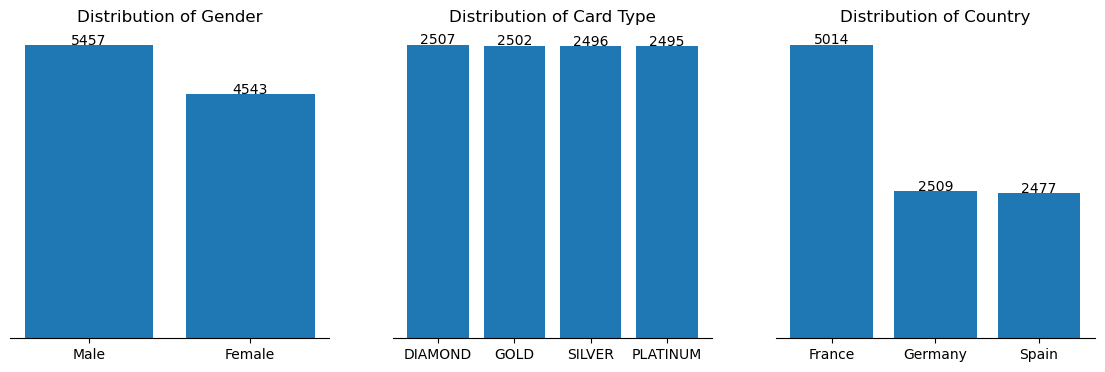

In [40]:
#Exploring the Categorical variables(Gender, Card Type, Geography)
fig, ax = plt.subplots(1, 3, figsize=[14, 4])
ax[0].bar(x=df1['Gender'].value_counts().index, height=df1['Gender'].value_counts().values)
ax[1].bar(x=df1['Card Type'].value_counts().index, height=df1['Card Type'].value_counts().values)
ax[2].bar(x=df1['Country'].value_counts().index, height=df1['Country'].value_counts().values)

#removing spines
ax[0].spines[['left', 'right', 'top']].set_visible(False)
ax[1].spines[['left', 'right', 'top']].set_visible(False)
ax[2].spines[['left', 'right', 'top']].set_visible(False)

#remove the yaxis
ax[0].yaxis.set_visible(False)
ax[1].yaxis.set_visible(False)
ax[2].yaxis.set_visible(False)

#add annotation
for index, values in enumerate(df1['Gender'].value_counts()):
    ax[0].annotate(values, xy=(index, values+70), ha='center', va='center')

for index, values in enumerate(df1['Card Type'].value_counts()):
    ax[1].annotate(values, xy=(index, values+39), ha='center', va='center')
    
for index, values in enumerate(df1['Country'].value_counts()):
    ax[2].annotate(values, xy=(index, values+80), ha='center', va='center')
    
#add title
ax[0].set_title('Distribution of Gender')
ax[1].set_title('Distribution of Card Type')
ax[2].set_title('Distribution of Country')
    
plt.show()

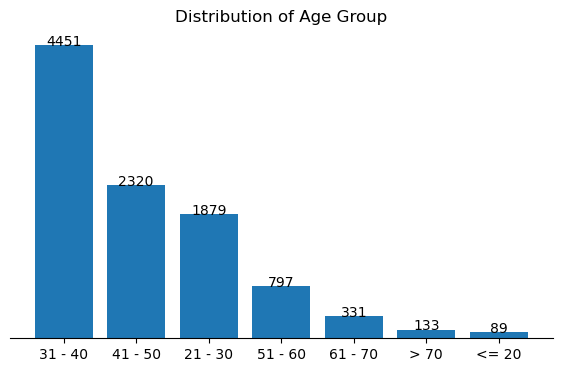

In [41]:
#exploring the Age Group

fig, ax = plt.subplots(figsize=[7, 4])
ax.bar(x=df1['Age Group'].value_counts().index, height=df1['Age Group'].value_counts().values)

#removing spines
ax.spines[['left', 'right', 'top']].set_visible(False)


#remove the yaxis
ax.yaxis.set_visible(False)

#add annotation
for index, values in enumerate(df1['Age Group'].value_counts()):
    ax.annotate(values, xy=(index, values+50), ha='center', va='center')

#add title
ax.set_title('Distribution of Age Group')

plt.show()

## Data Analysis

### Total Customers

In [42]:
#Calculating total customers
total_customers = df1['CustomerId'].count()
total_customers

10000

### Total Churned Customers

In [43]:
#Creating the churn dataframe
churned_df = df1[df1['Churned Status']=='Churned']

In [44]:
#calculating total churn
total_churn = churned_df['CustomerId'].count()
total_churn

2038

### Churn Rate

In [45]:
#calculating the churn rate
churn_rate = ((total_churn/total_customers)*100).round(2)
churn_rate

20.38

## Churn Rate by Gender and Account Activity

### Summarize the data by Gender

In [46]:
#Summarize the data by Gender
gender_churn = df1.pivot_table(index='Gender', columns='Churned Status', values='CustomerId', aggfunc='count')
gender_churn

Churned Status,Churned,Not Churned
Gender,,
Female,1139,3404
Male,899,4558


In [47]:
#create the percentage churned and not churned for the gender
gender_churn['% Churned'] = round((gender_churn['Churned']/(gender_churn['Churned']+gender_churn['Not Churned']))*100, 1)
gender_churn['% Not Churned'] = round((gender_churn['Not Churned']/(gender_churn['Churned']+gender_churn['Not Churned']))*100, 1)

In [48]:
#display the gender churn
gender_churn

Churned Status,Churned,Not Churned,% Churned,% Not Churned
Gender,,,,
Female,1139,3404,25.1,74.9
Male,899,4558,16.5,83.5


### Summarize the data by Account Activity

In [50]:
#summarize the account activity
act_churn = df1.pivot_table(index='Activity Status', columns='Churned Status', values='CustomerId', aggfunc='count')
act_churn

Churned Status,Churned,Not Churned
Activity Status,,
Active,735,4416
Not Active,1303,3546


In [51]:
#creating percentage churn and not churn columns
act_churn['% Churned'] = round((act_churn['Churned']/(act_churn['Churned']+act_churn['Not Churned']))*100, 1)
act_churn['% Not Churned'] = round((act_churn['Not Churned']/(act_churn['Churned']+act_churn['Not Churned']))*100, 1)

In [52]:
#display the act_churn
act_churn

Churned Status,Churned,Not Churned,% Churned,% Not Churned
Activity Status,,,,
Active,735,4416,14.3,85.7
Not Active,1303,3546,26.9,73.1


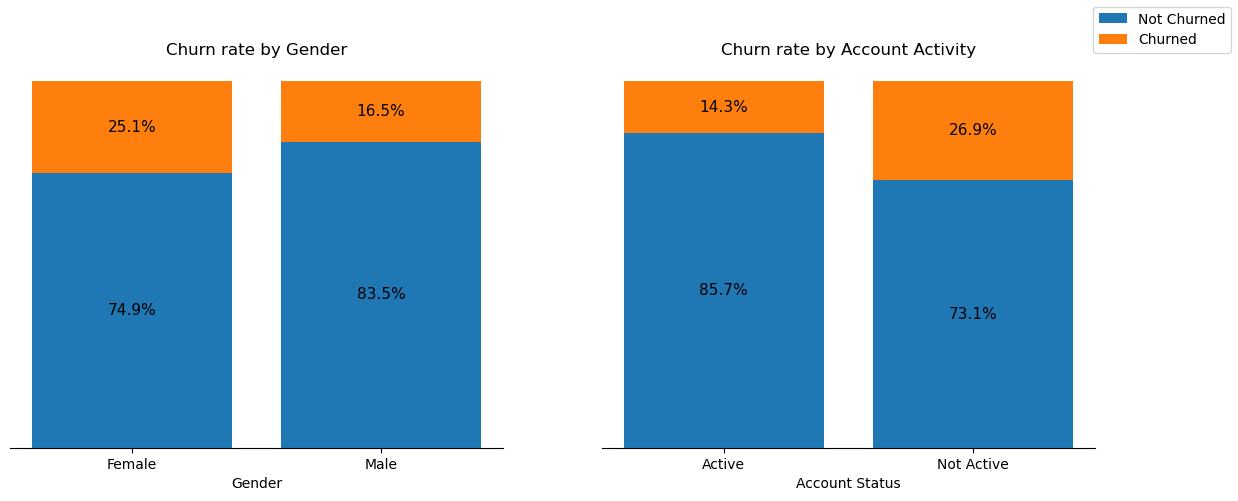

In [61]:
### Plot the Churn Rate by Gender and Account Activity
fig, ax = plt.subplots(1, 2, figsize=[14, 5])

ax[0].bar(gender_churn.index, gender_churn['% Not Churned'], label='Not Churned')
ax[0].bar(gender_churn.index, gender_churn['% Churned'], bottom=gender_churn['% Not Churned'], label='Churned')

ax[1].bar(act_churn.index, act_churn['% Not Churned'])

ax[1].bar(act_churn.index,
         act_churn['% Churned'],
         bottom=act_churn['% Not Churned'])

#add title, label
ax[0].set_title('Churn rate by Gender')
ax[1].set_title('Churn rate by Account Activity')
ax[0].set_xlabel('Gender')
ax[1].set_xlabel('Account Status')

#add annotation
for c in ax[0].containers:
    labels = [str(v.get_height().round(1))+'%' if v.get_height()>0 else '' for v in c]
    ax[0].bar_label(c,
               labels=labels,
               label_type='center',
               size=11)
for c in ax[1].containers:
    labels = [str(v.get_height().round(1))+'%' if v.get_height()>0 else '' for v in c]
    ax[1].bar_label(c,
               labels=labels,
               label_type='center',
               size=11)

#remove spines and axis
sns.despine(left=True)
ax[0].yaxis.set_visible(False)
ax[1].yaxis.set_visible(False)

fig.legend()
plt.show()

## Churn Rate by Complain Status and Credit Card Users

#### Summarize the data by Complain Status

In [63]:
complain_churn = df1.pivot_table(index='Complain', columns='Churned Status', values='CustomerId', aggfunc='count')
complain_churn

Churned Status,Churned,Not Churned
Complain,,
Complained,2034,10
No Complain,4,7952


In [64]:
#creating percentage churn and not churn columns
complain_churn['% Churned'] = round((complain_churn['Churned']/(complain_churn['Churned']+complain_churn['Not Churned']))*100, 1)
complain_churn['% Not Churned'] = round((complain_churn['Not Churned']/(complain_churn['Churned']+complain_churn['Not Churned']))*100, 1)
complain_churn

Churned Status,Churned,Not Churned,% Churned,% Not Churned
Complain,,,,
Complained,2034,10,99.5,0.5
No Complain,4,7952,0.1,99.9


#### Summarize the data by Credit Card users

In [66]:
# Summarize the data by Credit Card users

card_churn = df1.pivot_table(index='HasCrCard', columns='Churned Status', values='CustomerId', aggfunc='count')
card_churn

Churned Status,Churned,Not Churned
HasCrCard,,
Not Owned,613,2332
Owned,1425,5630


In [67]:
#creating percentage churn and not churn columns
card_churn['% Churned'] = round((card_churn['Churned']/(card_churn['Churned']+card_churn['Not Churned']))*100, 1)
card_churn['% Not Churned'] = round((card_churn['Not Churned']/(card_churn['Churned']+card_churn['Not Churned']))*100, 1)
card_churn

Churned Status,Churned,Not Churned,% Churned,% Not Churned
HasCrCard,,,,
Not Owned,613,2332,20.8,79.2
Owned,1425,5630,20.2,79.8


#### Plotting a 100% Stacked Bar for the Churn rate by Complain and Credit Card Users

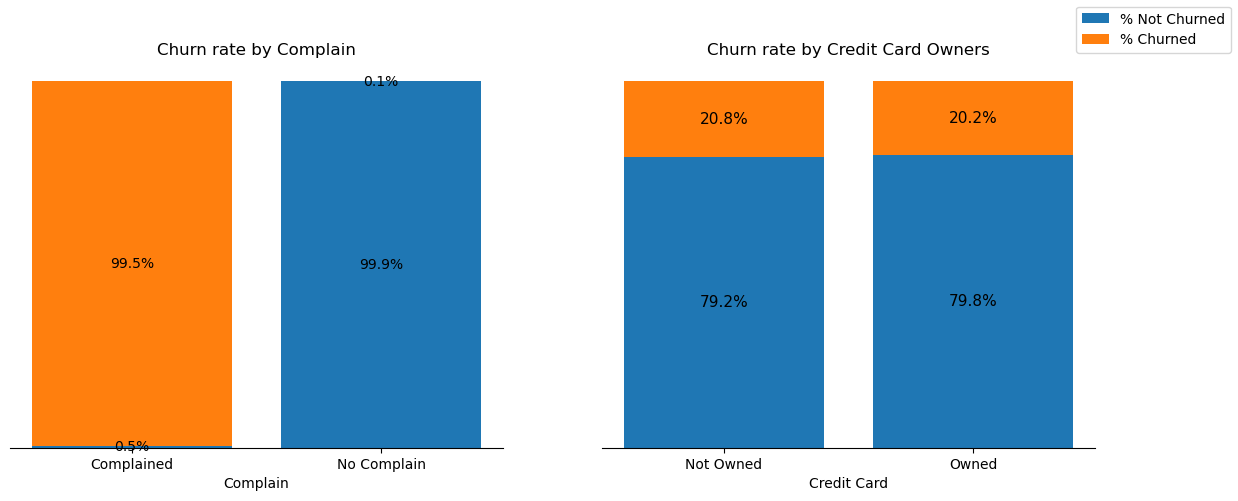

In [72]:
#plotting a 100% Stacked Bar for the Churn rate by Complain and credit card users

fig, ax = plt.subplots(1, 2, figsize=[14, 5])

ax[0].bar(complain_churn.index,
         complain_churn['% Not Churned'],
         label='% Not Churned')
ax[0].bar(complain_churn.index,
         complain_churn['% Churned'],
         label='% Churned',
         bottom=complain_churn['% Not Churned'])

ax[1].bar(card_churn.index,
         card_churn['% Not Churned'])
ax[1].bar(card_churn.index,
         card_churn['% Churned'],
         bottom=card_churn['% Not Churned'])


#add title, label
ax[0].set_title('Churn rate by Complain')
ax[1].set_title('Churn rate by Credit Card Owners')
ax[0].set_xlabel('Complain')
ax[1].set_xlabel('Credit Card')

#remove spines and axis
sns.despine(left=True)
ax[0].yaxis.set_visible(False)
ax[1].yaxis.set_visible(False)

#add legend
fig.legend()


# add bar annotation
for c in ax[0].containers:
    labels = [str(v.get_height().round(1))+'%' if v.get_height()>0 else '' for v in c]
    ax[0].bar_label(c,
                   labels=labels,
                   size=10,
                   label_type='center')
for c in ax[1].containers:
    labels = [str(v.get_height().round(1))+'%' if v.get_height()>0 else '' for v in c]
    ax[1].bar_label(c,
                   labels=labels,
                   size=11,
                   label_type='center')

plt.show()

## Churn Rate by Country

In [73]:
#summarize the table by country and churn status
churn_country = df1.pivot_table(index='Country', columns='Churned Status', values='CustomerId', aggfunc='count')
churn_country

Churned Status,Churned,Not Churned
Country,,
France,811,4203
Germany,814,1695
Spain,413,2064


In [74]:
#create percentage churned and not churned
churn_country['% Churned'] = round((churn_country['Churned']/(churn_country['Churned']+churn_country['Not Churned']))*100, 1)
churn_country['% Not Churned'] = round((churn_country['Not Churned']/(churn_country['Churned']+churn_country['Not Churned']))*100, 1)
churn_country

Churned Status,Churned,Not Churned,% Churned,% Not Churned
Country,,,,
France,811,4203,16.2,83.8
Germany,814,1695,32.4,67.6
Spain,413,2064,16.7,83.3


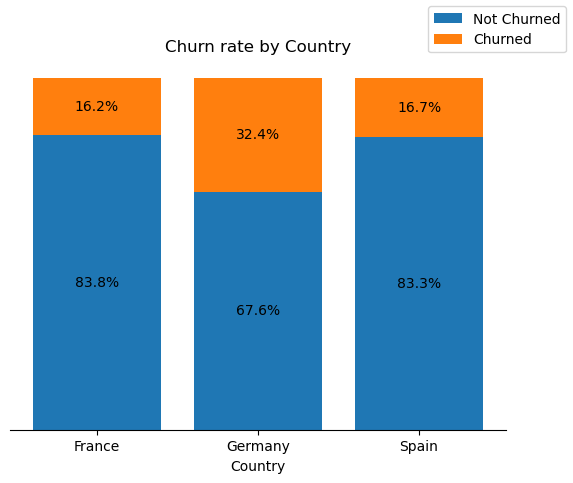

In [75]:
#plotting a 100% stacked bar chart of the percentage churn and not churn by country

fig, ax = plt.subplots()

ax.bar(churn_country.index, 
       churn_country['% Not Churned'],
      label = 'Not Churned')

ax.bar(churn_country.index,
      churn_country['% Churned'],
      label = 'Churned',
      bottom = churn_country['% Not Churned'])

for c in ax.containers:
    labels = [str(v.get_height().round(1))+'%' if v.get_height()>0 else '' for v in c]
    ax.bar_label(c, label_type='center', labels=labels, size=10)

#add title, labels and legend
ax.set_title('Churn rate by Country')
ax.set_ylabel('Churn Rate')
ax.set_xlabel('Country')
fig.legend()

#remove yticks, spines
ax.yaxis.set_visible(False)
sns.despine(left=True)
plt.show()

## Churn Rate by Age Group

In [76]:
#group the dataframe by Age group and count the total. This gives the total customers by Age Group
ag1 = df1.groupby(['Age Group'], as_index=False).agg(total=('CustomerId', 'count'))
ag1

,Age Group,total
0,21 - 30,1879
1,31 - 40,4451
2,41 - 50,2320
3,51 - 60,797
4,61 - 70,331
5,<= 20,89
6,> 70,133


In [77]:
#group the churned dataframe by Age group and count the total. This gives the total churn by age group
ag2 = churned_df.groupby('Age Group', as_index=False).agg(total_churn=('CustomerId', 'count'))
ag2

,Age Group,total_churn
0,21 - 30,143
1,31 - 40,539
2,41 - 50,788
3,51 - 60,448
4,61 - 70,104
5,<= 20,5
6,> 70,11


In [78]:
#merged the two dataframe based on the age group. This create a dataframe of age group with total customers and total churn
age_grp_merged = ag1.merge(ag2, how='inner', on='Age Group')
age_grp_merged

,Age Group,total,total_churn
0,21 - 30,1879,143
1,31 - 40,4451,539
2,41 - 50,2320,788
3,51 - 60,797,448
4,61 - 70,331,104
5,<= 20,89,5
6,> 70,133,11


In [79]:
#calculate the churn rate and create the column in the dataframe
age_grp_merged['churn_rate'] = round((age_grp_merged['total_churn']/age_grp_merged['total'])*100, 1)
age_grp_merged

,Age Group,total,total_churn,churn_rate
0,21 - 30,1879,143,7.6
1,31 - 40,4451,539,12.1
2,41 - 50,2320,788,34.0
3,51 - 60,797,448,56.2
4,61 - 70,331,104,31.4
5,<= 20,89,5,5.6
6,> 70,133,11,8.3


In [80]:
#create an index column for sorting the dataframe based on Age Group
age_grp_merged['index'] = age_grp_merged['Age Group']

#create a map dictionary
dict7 = {
    '<= 20': 1,
    '21 - 30': 2,
    '31 - 40': 3,
    '41 - 50': 4,
    '51 - 60': 5,
    '61 - 70': 6,
    '> 70': 7
}

#map the index to the dict7
age_grp_merged['index'] = age_grp_merged['index'].map(dict7)

In [81]:
#sort the dataframe using the index column
age_grp_merged = age_grp_merged.sort_values('index', ascending=True)
age_grp_merged

,Age Group,total,total_churn,churn_rate,index
5,<= 20,89,5,5.6,1
0,21 - 30,1879,143,7.6,2
1,31 - 40,4451,539,12.1,3
2,41 - 50,2320,788,34.0,4
3,51 - 60,797,448,56.2,5
4,61 - 70,331,104,31.4,6
6,> 70,133,11,8.3,7


In [82]:
#reorder the columns
age_grp_merged = age_grp_merged.reindex(labels=['index', 'Age Group', 'total','total_churn', 'churn_rate'], axis=1)
age_grp_merged

,index,Age Group,total,total_churn,churn_rate
5,1,<= 20,89,5,5.6
0,2,21 - 30,1879,143,7.6
1,3,31 - 40,4451,539,12.1
2,4,41 - 50,2320,788,34.0
3,5,51 - 60,797,448,56.2
4,6,61 - 70,331,104,31.4
6,7,> 70,133,11,8.3


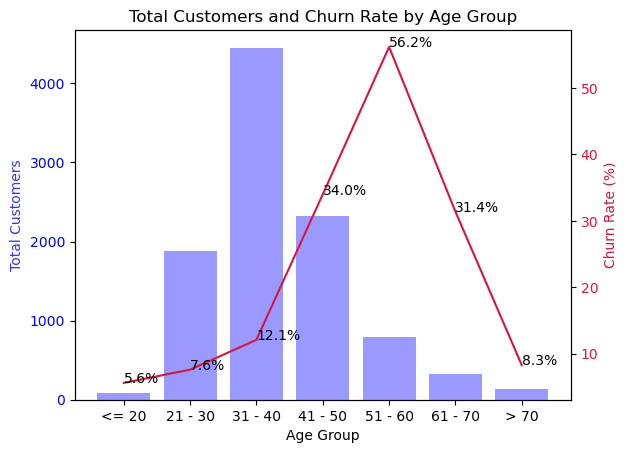

In [83]:
#Creating a dual plot of total customer and churn rate by Age group

fig, ax = plt.subplots()
color1 = 'blue'
ax.bar(x=age_grp_merged['Age Group'], height=age_grp_merged['total'], alpha=0.4, color=color1)

#add ylabel, x_label and title
ax.set_ylabel('Total Customers', color=color1, alpha=0.8) #add y_label
ax.set_xlabel('Age Group') #add x_label
ax.set_title('Total Customers and Churn Rate by Age Group') #add title
ax.tick_params(axis='y', labelcolor=color1)



ax1 = ax.twinx()

color2 = 'crimson'
ax1.plot(age_grp_merged['Age Group'], age_grp_merged['churn_rate'], color=color2)

#add ylabel
ax1.set_ylabel('Churn Rate (%)', color=color2)
ax1.tick_params(axis='y', labelcolor=color2)

for index, value in enumerate(age_grp_merged['churn_rate']):
    ax1.text(index, value, str(value)+'%')

plt.show()

## Churn Rate by Acct Balance

In [84]:
#group by acct balance and get the total customers
act_bal_grp = df1.groupby(['Acct Balance'], as_index=False).agg(total=('CustomerId', 'count'))
act_bal_grp

,Acct Balance,total
0,100K - 200K,4765
1,10K - 100K,1583
2,<= 10K,3618
3,> 200K,34


In [85]:
#group the churned data by acct balance and get the total churned
churn_acct = churned_df.groupby(['Acct Balance'], as_index=False).agg(total_churn=('CustomerId', 'count'))
churn_acct

,Acct Balance,total_churn
0,100K - 200K,1192
1,10K - 100K,326
2,<= 10K,501
3,> 200K,19


In [86]:
#merged the two dataframe together
acct_bal_merged = act_bal_grp.merge(churn_acct, on='Acct Balance', how='inner')
acct_bal_merged

,Acct Balance,total,total_churn
0,100K - 200K,4765,1192
1,10K - 100K,1583,326
2,<= 10K,3618,501
3,> 200K,34,19


In [87]:
#add an index column for sorting the dataframe
acct_bal_merged['index'] = acct_bal_merged['Acct Balance']

#create a dictionary
dict8 = {
    '<= 10K': 1,
    '10K - 100K': 2,
    '100K - 200K': 3,
    '> 200K': 4
}

#map the dict to the index
acct_bal_merged['index'] = acct_bal_merged['index'].map(dict8)

In [88]:
acct_bal_merged

,Acct Balance,total,total_churn,index
0,100K - 200K,4765,1192,3
1,10K - 100K,1583,326,2
2,<= 10K,3618,501,1
3,> 200K,34,19,4


In [89]:
#sort the dataframe by indec
acct_bal_merged = acct_bal_merged.sort_values('index', ascending=True)
acct_bal_merged

,Acct Balance,total,total_churn,index
2,<= 10K,3618,501,1
1,10K - 100K,1583,326,2
0,100K - 200K,4765,1192,3
3,> 200K,34,19,4


In [90]:
#reorder the columns
acct_bal_merged = acct_bal_merged.reindex(labels=['index', 'Acct Balance', 'total', 'total_churn'], axis=1)
acct_bal_merged

,index,Acct Balance,total,total_churn
2,1,<= 10K,3618,501
1,2,10K - 100K,1583,326
0,3,100K - 200K,4765,1192
3,4,> 200K,34,19


In [91]:
#create a churn rate column
acct_bal_merged['churn_rate'] = round((acct_bal_merged['total_churn']/acct_bal_merged['total'])*100, 1)
acct_bal_merged

,index,Acct Balance,total,total_churn,churn_rate
2,1,<= 10K,3618,501,13.8
1,2,10K - 100K,1583,326,20.6
0,3,100K - 200K,4765,1192,25.0
3,4,> 200K,34,19,55.9


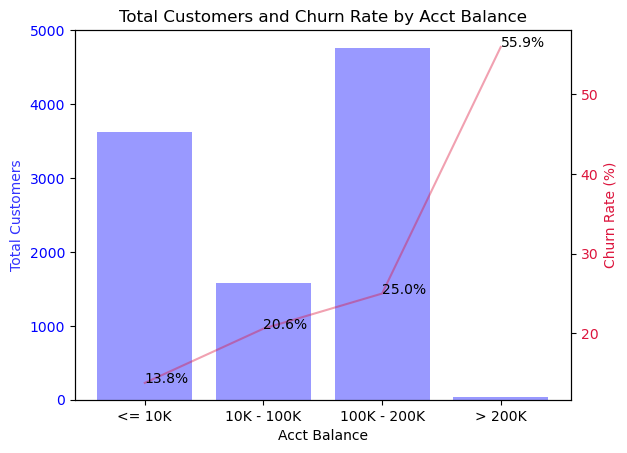

In [92]:
#Creating a dual plot of total customer and churn rate by Acct Balance

fig, ax = plt.subplots()
color1 = 'blue'
ax.bar(x=acct_bal_merged['Acct Balance'], height=acct_bal_merged['total'], alpha=0.4, color=color1)

#add ylabel, x_label and title
ax.set_ylabel('Total Customers', color=color1, alpha=0.8) #add y_label
ax.set_xlabel('Acct Balance') #add x_label
ax.set_title('Total Customers and Churn Rate by Acct Balance') #add title
ax.tick_params(axis='y', labelcolor=color1)



ax1 = ax.twinx()

color2 = 'crimson'
ax1.plot(acct_bal_merged['Acct Balance'], acct_bal_merged['churn_rate'], color=color2, alpha=0.4)

#add ylabel
ax1.set_ylabel('Churn Rate (%)', color=color2)
ax1.tick_params(axis='y', labelcolor=color2)

for index, value in enumerate(acct_bal_merged['churn_rate']):
    ax1.text(index, value, str(value)+'%')

plt.show()

In [93]:
df1.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Country,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,Activity Status,Churned Status,Complain,Satisfaction Score,Card Type,Point Earned,Age Group,Acct Balance,Point Earned Group,Credit Score Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Owned,Active,Churned,Complained,Unsatisfied,DIAMOND,464,41 - 50,<= 10K,401 - 500,401 - 500
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,Not Owned,Active,Not Churned,Complained,Neutral,DIAMOND,456,41 - 50,10K - 100K,401 - 500,401 - 500


## Churn Rate by Satisfaction

In [97]:
#summarize the data by satisfaction
sat_churn = df1.pivot_table(index='Satisfaction Score', columns='Churned Status', values='CustomerId', aggfunc='count', margins=True, margins_name='Total')
sat_churn

Churned Status,Churned,Not Churned,Total
Satisfaction Score,,,
Neutral,401,1641,2042
Satisfied,414,1594,2008
Unsatisfied,439,1575,2014
Very Satisfied,397,1607,2004
Very Unsatisfied,387,1545,1932
Total,2038,7962,10000


In [98]:
#create a churn rate column
sat_churn['Churn Rate'] = round((sat_churn['Churned']/sat_churn['Total'])*100, 1)
sat_churn

Churned Status,Churned,Not Churned,Total,Churn Rate
Satisfaction Score,,,,
Neutral,401,1641,2042,19.6
Satisfied,414,1594,2008,20.6
Unsatisfied,439,1575,2014,21.8
Very Satisfied,397,1607,2004,19.8
Very Unsatisfied,387,1545,1932,20.0
Total,2038,7962,10000,20.4


In [99]:
#drop unnecessary rows
sat_churn.drop('Total', axis=0, inplace=True)

In [100]:
sat_churn.index

Index(['Neutral', 'Satisfied', 'Unsatisfied', 'Very Satisfied',
       'Very Unsatisfied'],
      dtype='object', name='Satisfaction Score')

In [101]:
#sort the dataframe by index
sat_churn = sat_churn.reindex(labels=['Very Unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied'], axis=0)
sat_churn

Churned Status,Churned,Not Churned,Total,Churn Rate
Satisfaction Score,,,,
Very Unsatisfied,387,1545,1932,20.0
Unsatisfied,439,1575,2014,21.8
Neutral,401,1641,2042,19.6
Satisfied,414,1594,2008,20.6
Very Satisfied,397,1607,2004,19.8


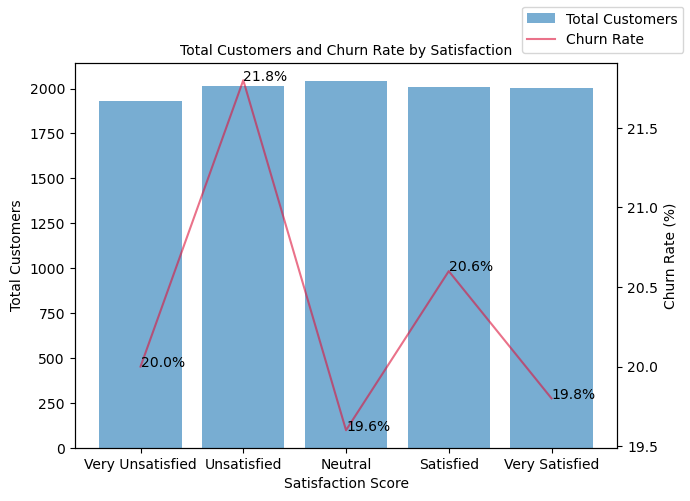

In [121]:
#plotting total customer and churn rate by Satisfaction
fig, ax = plt.subplots(figsize=[7, 5])

ax.bar(sat_churn.index, sat_churn['Total'], alpha=0.6, label='Total Customers')

ax1 = ax.twinx()

color2 = 'crimson'
ax1.plot(sat_churn.index, sat_churn['Churn Rate'], color = color2, alpha=0.6, label='Churn Rate')

#add title, label and legend
ax.set_title('Total Customers and Churn Rate by Satisfaction', size=10)
ax.set_xlabel('Satisfaction Score')
ax.set_ylabel('Total Customers')
ax1.set_ylabel('Churn Rate (%)')
fig.legend()

#add annotation to the line chart
for index, values in enumerate(sat_churn['Churn Rate']):
    ax1.text(index, values, str(values)+'%')

  
plt.show()